# 📧 Email Spam Detection Project


## 📝 Problem Statement

The goal of this project is to build a machine learning model that can accurately classify emails as **spam** or **not spam (ham)**. Spam detection plays a critical role in filtering out unwanted or harmful messages in email systems.


## 🎯 Objective

- Load and explore the dataset
- Preprocess the text data and convert it into numerical format
- Train and evaluate multiple classification models (e.g., Naive Bayes, Random Forest)
- Tune hyperparameters using `GridSearchCV`
- Evaluate model performance using metrics like **accuracy**, **precision**, **recall**, and **F1 score**
- Identify the best-performing model for spam detection


## Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
import warnings
warnings.filterwarnings("ignore")


In [65]:
#df is the dataframe
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [66]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [69]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [70]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### finding null values


In [43]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### dropping null values

In [44]:

df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [45]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()


,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
df1.shape


(5572, 2)

### Converting the categorical values into numerical values


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam or Ham'] = encoder.fit_transform(df1['Spam or Ham'])


### Finding duplicates


In [49]:
df1.duplicated().sum()

403

### dropping duplicates


In [50]:
df1 = df1.drop_duplicates(keep = 'first')

In [51]:
df1.duplicated().sum()


0

# Data Visualization
### Message length distribution


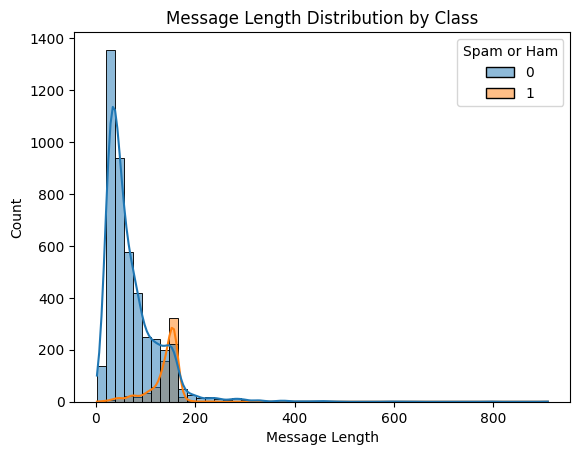

In [52]:
df1['Message Length'] = df1['Mail Message'].apply(len)
sns.histplot(data=df1, x='Message Length', hue='Spam or Ham', bins=50, kde=True)
plt.title('Message Length Distribution by Class')
plt.show()

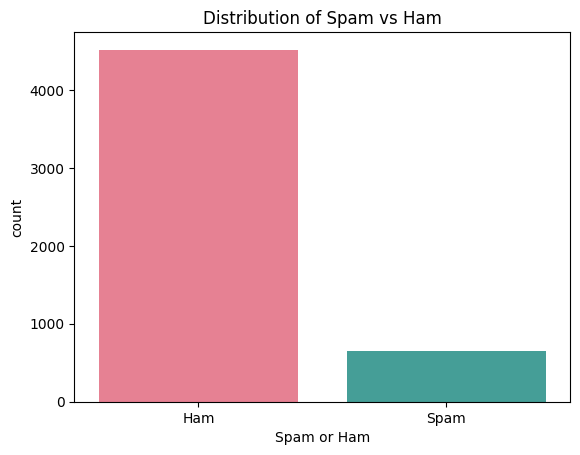

In [53]:
sns.countplot(data=df1, x='Spam or Ham', palette='husl')
plt.title('Distribution of Spam vs Ham')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

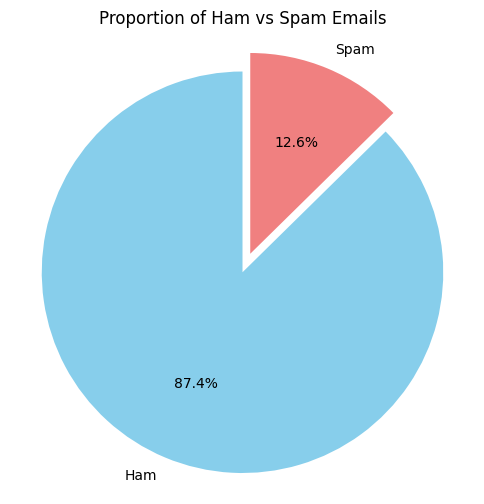

In [54]:
labels = ['Ham', 'Spam']
sizes = df1['Spam or Ham'].value_counts(sort=False)  # 0 = Ham, 1 = Spam
colors = ['skyblue', 'lightcoral']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Proportion of Ham vs Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

## 🔮 Prediction

After training and tuning the machine learning models, the best-performing model (Random Forest Classifier) was used to make predictions on unseen email data (test set).

The test data was first transformed using the same `CountVectorizer` used during training to ensure consistency in feature extraction. The model then predicted whether each message was **spam** or **ham**.

### ✅ Interpretation of Predictions:

- **Spam (Label: 1)**: The message is classified as spam and is likely irrelevant, promotional, or potentially harmful.
- **Ham (Label: 0)**: The message is considered legitimate and safe for the user to read.

The results showed high accuracy and strong balance between **precision** and **recall**, indicating that the model is both precise in catching spam and good at not missing spam messages.

This predictive system can be deployed in real-world email platforms to automatically flag or filter out unwanted emails, improving user experience and safety.


### Splitting the data


In [55]:
X =  df1["Mail Message"]
y =df1["Spam or Ham"]



### Splitting the data into training and testing data


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)


### Convert the text data into a matrix of token counts


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Fitting multinomial naive bayes 


In [60]:
#Testing  the mail (spam/ham)

mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred


array([0])

In [58]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

### finding accuracy of the training dataset


In [61]:
model.score(X_train_count,y_train)


0.9929866989117292

### finding accuracy of the test dataset


In [62]:
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9816247582205029

In [71]:


# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_rf.fit(X_train_count, y_train)

# Best model results
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

# Evaluate on test data
X_test_count = cv.transform(X_test.values)
y_pred = grid_search_rf.best_estimator_.predict(X_test_count)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.9719467956469166
Test Accuracy: 0.9749
Test Precision: 1.0000
Test Recall: 0.8255
Test F1 Score: 0.9044


## 📊 Observations

- The dataset contains two main labels: `ham` and `spam`
- Several unnamed or irrelevant columns were dropped during cleaning
- The `LabelEncoder` was used to convert categorical labels into numerical form
- `CountVectorizer` was used to transform text data into a numeric format suitable for machine learning
- The data was split into training and testing sets to evaluate generalization
- After hyperparameter tuning, the **Random Forest Classifier** produced strong results


## ❓ Key Questions Answered

- **What features are used to detect spam?**  
  The main feature is the email content itself, which is vectorized using bag-of-words (`CountVectorizer`).

- **Which model performs best?**  
  After tuning with `GridSearchCV`, the **Random Forest Classifier** achieved high performance.

- **How is the model evaluated?**  
  The model is evaluated using standard metrics:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1 Score**

- **Why is this project important?**  
  Accurate spam detection enhances email user experience and protects users from phishing, scams, and other malicious content.


## 🧾 Conclusion

In this project, we successfully developed a machine learning model for **email spam detection** using a labeled dataset of messages. The following steps were carried out:

- Data was cleaned and unnecessary columns were dropped.
- The labels (`spam` and `ham`) were encoded into numerical format.
- Text messages were vectorized using `CountVectorizer` to convert them into numerical features.
- Several models were tested, including **Multinomial Naive Bayes** and **Random Forest Classifier**.
- Hyperparameter tuning using `GridSearchCV` was applied to improve model performance.
- The final model was evaluated using key classification metrics.